In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Prepare simulated data

This will be replaced by real data (from Eagle sim)


In [2]:
from pysampler import sampler, statistics
from massf_sampler import mass_function, mass_sampler

In [3]:
from scipy.interpolate import interp1d

In [24]:
def mass_function(massx):
    phi_star, alpha, m_star = 4.032e-3, -0.45, 10**10.62
    m = np.linspace(1e10, 1e14)
    x = m / m_star
    mf = phi_star * np.power(x, alpha) * np.exp(-x)
    return np.interp(massx, m, mf )

In [25]:
mass = []
mass2 = []

nbins=50
blue = (4.032e-3, -0.45, 10**10.62) # Schechter blue parameters

for i in range(10):
    sample2 = mass_sampler(1e10,1e14, blue,resolution=1000, size=1000000)
    sample = sampler(mass_function, 1e10,1e14,resolution=1000, size=1000000)
    mass.append(sample)
    mass2.append(sample2)

In [26]:
average_sample, bin_center, mean, std = statistics(np.log10(mass), nbins)

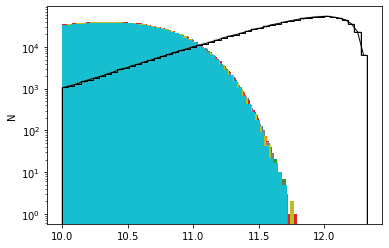

In [27]:
for mm in mass:
    plt.hist(np.log10(mm), bins=nbins, histtype='step', lw=0.1)
for mmm in mass2:
    plt.hist(np.log10(mmm), bins=nbins, lw=0.1)

plt.hist(average_sample, bins=nbins, histtype='step', color='k')
plt.errorbar(bin_center, mean, yerr=std, color='k', lw=1) 

plt.ylabel('N')

plt.yscale('log')
plt.show()